***Import required libraries.***

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Ads_CTR_Optimisation.csv to Ads_CTR_Optimisation.csv


***Import dataset and print it.***

In [3]:
import io

dataset = pd.read_csv(io.StringIO(uploaded['Ads_CTR_Optimisation.csv'].decode('utf-8')))

print(dataset.head())

   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


# ***Building UCB from scratch.***

In [16]:
N = 10000
d = 10
number_of_selections = [0] * d
sum_of_rewards = [0] * d
ad_selected = []
total_reward = 0
for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if(number_of_selections[i] > 0):
      avg_reward = sum_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1) / number_of_selections[i])
      upper_bound = avg_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ad_selected.append(ad)
  number_of_selections[ad] += 1
  reward = dataset.values[n,ad]
  sum_of_rewards[ad] += reward
  total_reward += reward
  
  
print("Total reward is : ",total_reward)    

Total reward is :  2178


# ***Visualising the UCB***

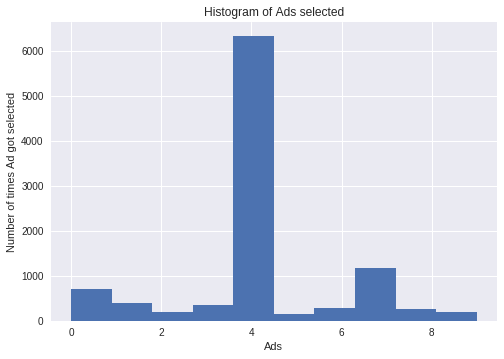

In [13]:
plt.hist(ad_selected)
plt.title('Histogram of Ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times Ad got selected')
plt.show()

**Index 4 is selected i.e., Ad number 5 is most likely to be selected out of 10 Ads.**